# Webinar 2021-07-08

W trakcie webinaru będziemy prezentować w jaki sposób można dokonać analizy danych przy użyciu `Python`.

## Plan działania:
1. Wczytanie danych do analizy,
1. Zapoznanie się ze strukturą danych po zaimportowaniu do `Pandas`,
1. Wyznaczenie unikalnych wartości w obrębie poszczególnych kolumn,
1. Podstawowe techniki agregacji,
1. Graficzna reprezentacja wyników.

In [68]:
# importujemy Pandas jak podstawową bibliotekę do obróbki danych
import pandas as pd

## Zapoznanie ze zbiorem danych

### Załadowanie danych

In [69]:
titanic_df = pd.read_csv('./data/titanic.csv')

### Wyświetlenie struktury tabeli

Mamy tutaj trzy kolumny:
1. Nazwę kolumny,
1. Liczbę wartości nie pustych w kolumnie
1. Typ kolumny

In [70]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
titanic_df.head()  # wyświetlamy pierwsze 5 wierszy ramki danych

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Zmiana nazw kolumn

In [72]:
# Nadpisujemy nazwy kolumn, aby były bardziej opisowe (opcjonalnie)
titanic_df.columns = [
    'passanger_id',
    'has_survived',
    'passanger_class',
    'name',
    'sex',
    'age',
    'no_siblings',
    'no_parents',
    'ticket_number',
    'fare_paid',
    'cabin',
    'embarked_in'
]
titanic_df.head()

,passanger_id,has_survived,passanger_class,name,sex,age,no_siblings,no_parents,ticket_number,fare_paid,cabin,embarked_in
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Podsumowanie zbioru danych używając `describe`

Funkcja wyświetla podstawowe statystyki takie jak: 
* `count` - liczebność,
* `mean` - średnia,
* `std` - odchylenie standardowe,
* `min` - minimum,
* `25%`, `50%`, `75%` - czyli kwantyle (odpowiednio) I, II (mediana), III
* `max` - maximum

In [73]:
titanic_df.describe() 

,passanger_id,has_survived,passanger_class,age,no_siblings,no_parents,fare_paid
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analiza danych

### Najpierw dodamy nową paczkę - Matplotlib w celu wizualizacji

In [74]:
import matplotlib.pyplot as plt

### Histogram wieku pasażerów

In [75]:
# Najpierw przygotujemy dane

bin_data = titanic_df['age'].unique()  # lista unikalnych wieków pasażerów
bin_data.sort() # trzeba posortować przed narysowaniem histogramu!

Text(0.5, 1.0, 'Rozkład wieku pasażarów Titanica')

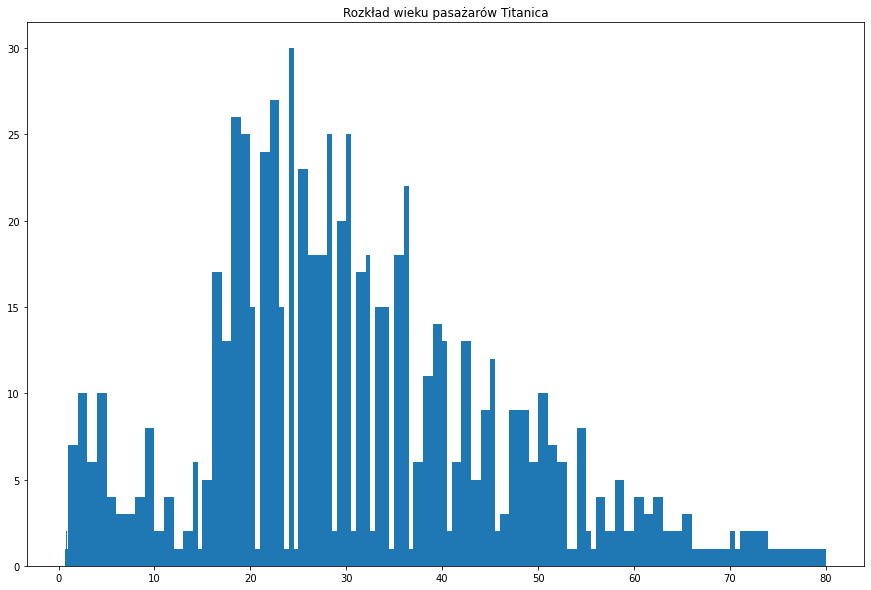

In [76]:
plt.figure(figsize=(15, 10))

plt.hist(
    x=titanic_df['age'],
    bins=bin_data[1:]
    )
;

plt.title("Rozkład wieku pasażarów Titanica")

In [77]:
# na powyższym wykresie jest dość dużo szumu związanego z wiekiem,
# dlatego pogrupujemy kolumnę `age` na koszyki co 10 lat

data_bins_agg = range(0, 100, 10)  # określamy przedziały wiekowe
titanic_df['age_agg'] = pd.cut(
    x=titanic_df['age'],  # zmienna, którą będziemy wyświetlać
    bins=data_bins_agg,  # koszyki gdzie wartości mają wpaść
    right=False  # określenie czy przedział ma być lewostronnie (False) czy prawostronnie (True - domyślnie) domknięty
)


''

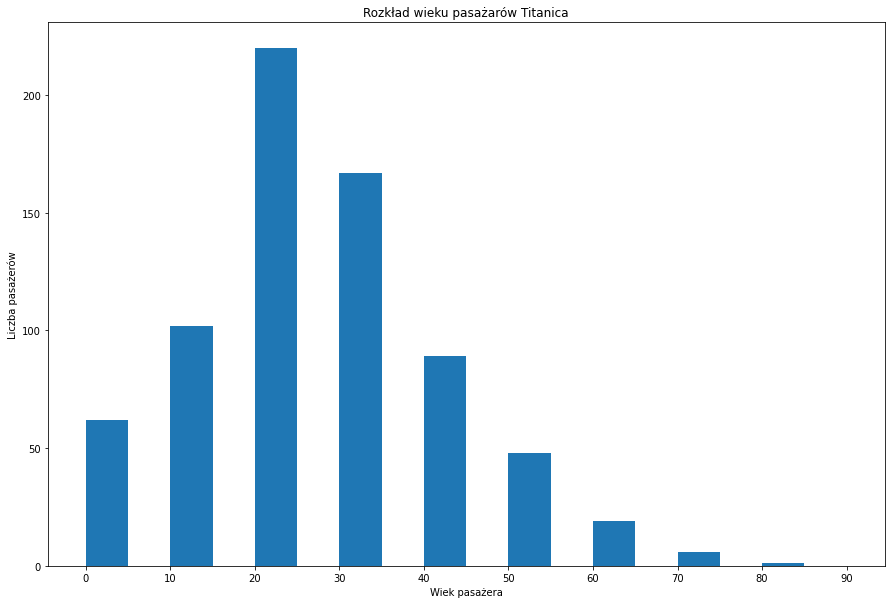

In [78]:
plt.figure(figsize=(15, 10))

# tworzymy histogram
plt.hist(
    x=titanic_df['age'],
    bins=data_bins_agg,
    width=5
    )

plt.xticks(ticks=data_bins_agg)

plt.ylabel("Liczba pasażerów")  # ustawienie tytułu osi y
plt.xlabel("Wiek pasażera")  # ustawienie tytułu osi x

# nadanie tytułu wykresu
plt.title("Rozkład wieku pasażarów Titanica")
;

In [79]:
# Wyświetlenie wartości użytych do stworzenia wykresu
titanic_df.groupby(by=['age_agg'])['age'].count()

age_agg
[0, 10)      62
[10, 20)    102
[20, 30)    220
[30, 40)    167
[40, 50)     89
[50, 60)     48
[60, 70)     19
[70, 80)      6
[80, 90)      1
Name: age, dtype: int64

## Analiza przeżycia vs wiek pasażera

## Podzielenie ramki na dwa zbiory - pasażerowie, którzy przeżyli i nie

In [80]:
has_survived_df = titanic_df.loc[titanic_df['has_survived'] == 1]
has_not_survived_df = titanic_df.loc[titanic_df['has_survived'] == 0]

Text(0.5, 0.98, 'Przeżywalność w zależności od wieku')

<Figure size 1080x720 with 0 Axes>

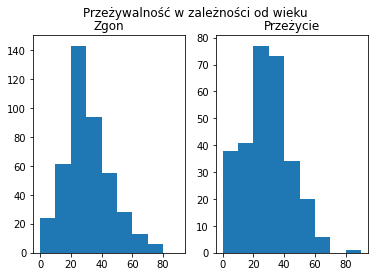

In [81]:
plt.figure(figsize=(15, 10))

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(
    x=has_not_survived_df['age'],
    bins=data_bins_agg
)
ax[0].set_title("Zgon")

ax[1].hist(
    x=has_survived_df['age'],
    bins=data_bins_agg
)
ax[1].set_title("Przeżycie")

fig.suptitle("Przeżywalność w zależności od wieku")

### To samo, ale jeśli chcemy pokazać ładnie przy użyciu tabeli przestawnej

In [82]:
pd.pivot_table(
    data=titanic_df,
    values='passanger_id',
    columns='has_survived',
    index='age_agg',
    aggfunc='count'
)

has_survived,0,1
age_agg,,
"[0, 10)",24,38
"[10, 20)",61,41
"[20, 30)",143,77
"[30, 40)",94,73
"[40, 50)",55,34
"[50, 60)",28,20
"[60, 70)",13,6
"[70, 80)",6,0
"[80, 90)",0,1
